Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [189]:
data = pd.read_csv('Walmart_Store_sales.csv')

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [191]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Task 1

In [192]:
data.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False)[:5]

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

Store no 20 has the maximum sales. 

## Task 2

In [193]:
data.groupby(['Store']).Weekly_Sales.std().sort_values(ascending=False)[:5]

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

Store no 14 has the maximum deviation.

In [194]:
(data.groupby('Store')['Weekly_Sales'].mean()/data.groupby(['Store']).Weekly_Sales.std())[:10]

Store
1     9.970873
2     8.102160
3     8.694034
4     7.868902
5     8.426840
6     7.362531
7     5.068303
8     8.550456
9     7.880502
10    6.284032
Name: Weekly_Sales, dtype: float64

In [195]:
data['Weekly_Sales'].mean()/data['Weekly_Sales'].std()

1.8551148077324786

I wasnt sure if the problem statement wanted the coeffiecient of variation for per store or they wanted it for the complete dataset, so i did both.

## Task 3

In [196]:
data['Date'] = pd.to_datetime(data['Date'])

In [197]:
start_qt = data[(data['Date'] < pd.to_datetime('2012-07-01'))]

In [198]:
end_qt = data[data['Date'] < pd.to_datetime('2012-10-01')]

In [199]:
(end_qt.groupby('Store').Weekly_Sales.sum() - (start_qt.groupby('Store').Weekly_Sales.sum())/start_qt.groupby('Store').Weekly_Sales.sum()).sort_values(ascending=False)[:10]

Store
20    2.884285e+08
4     2.864684e+08
14    2.783523e+08
13    2.742744e+08
2     2.639117e+08
10    2.605333e+08
27    2.438260e+08
6     2.147024e+08
1     2.128220e+08
19    1.982876e+08
Name: Weekly_Sales, dtype: float64

These are the top 10 stores with their growth rates in descending order, Store number 20 had the best growth rate in the 3rd Quarter of 2012.

Growth rate formula taken from: https://www.profitwell.com/recur/all/growth-rate

## Task 4

In [200]:
holidays = data[data['Holiday_Flag'] == 1]
holidays.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2530,18,2011-12-30,1010562.49,1,32.36,3.402,136.643258,8.471
707,5,2012-07-09,350648.91,1,86.30,3.730,223.029880,5.603
3199,23,2011-11-02,1249786.40,1,21.52,3.255,133.260871,5.114
534,4,2012-10-02,2374660.64,1,33.00,3.411,130.384903,4.607
5195,37,2010-12-31,460331.70,1,52.88,2.943,210.182398,8.476


In [201]:
Super_bowl = [pd.to_datetime('12-02-2010'), pd.to_datetime('11-02-2011'), pd.to_datetime('10-02-2012'), pd.to_datetime('08-02-2013')]
Christmas = [pd.to_datetime('31-12-2010'), pd.to_datetime('30-12-2011'), pd.to_datetime('28-12-2012'), pd.to_datetime('27-12-2013')]
Labour_day = [pd.to_datetime('10-09-2010'), pd.to_datetime('09-09-2011'), pd.to_datetime('07-09-2012'), pd.to_datetime('06-09-2013')]
ThanksGiving = [pd.to_datetime('26-11-2010'), pd.to_datetime('25-11-2011'), pd.to_datetime('23-11-2012'), pd.to_datetime('29-11-2013')]


In [202]:
Super_bowl_mean = holidays['Weekly_Sales'][holidays['Date'].apply(lambda x: x in Super_bowl)].mean()
Labour_day_mean = holidays['Weekly_Sales'][holidays['Date'].apply(lambda x: x in Labour_day)].mean()
Thanksgiving_mean = holidays['Weekly_Sales'][holidays['Date'].apply(lambda x: x in ThanksGiving)].mean()
Christmas_mean = holidays['Weekly_Sales'][holidays['Date'].apply(lambda x: x in Christmas)].mean()
Non_holiday_mean = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

print('Super bowl mean: {}\nLabour Day mean: {}\nThanksGivning mean: {}\nChristmas mean: {}\nNon holiday mean:{}'.format(Super_bowl_mean,Labour_day_mean,
                                                                                                                         Thanksgiving_mean, Christmas_mean,
                                                                                                                        Non_holiday_mean))

Super bowl mean: 1079127.9877037033
Labour Day mean: 1042427.2939259257
ThanksGivning mean: 1471273.427777778
Christmas mean: 960833.1115555551
Non holiday mean:1041256.3802088564


In [203]:
holiday_means = {
    'Super Bowl' : Super_bowl_mean,
    'Labour Day' : Labour_day_mean,
    'Thanksgiving' : Thanksgiving_mean,
    'Christmas' : Christmas_mean
}

for k, v in holiday_means.items():
    if v > Non_holiday_mean:
        print('{} has higher sales than non holiday days.\n'.format(k))

Super Bowl has higher sales than non holiday days.

Labour Day has higher sales than non holiday days.

Thanksgiving has higher sales than non holiday days.



## Task 5

In [204]:
month = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
month.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-01-31,1035,4.223988e+07,0,3144.06,123.045,7575.961790,381.388
2010-02-28,4140,1.915869e+08,0,9324.79,493.958,30219.861597,1537.421
2010-03-31,4140,1.862262e+08,0,9740.74,507.286,30262.322871,1536.412
2010-04-30,4140,1.838118e+08,0,11086.93,516.198,30186.006415,1529.588
2010-05-31,6210,2.806119e+08,0,14713.65,766.327,45328.082817,2304.317


Text(0.5, 1.0, 'Monthly Sales')

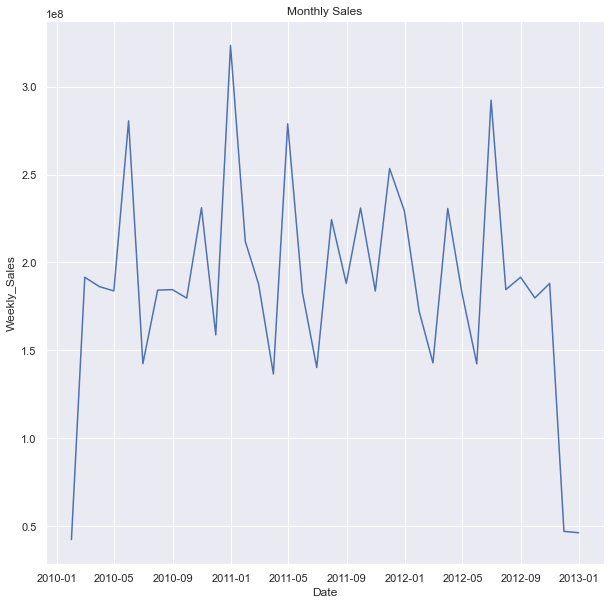

In [205]:
plt.figure(figsize=(10,10))
sns.lineplot(x=month.index, y=month['Weekly_Sales'])
plt.title('Monthly Sales')


1) The highest monthly sales occured in january 2011.

2) I have a doubt that sales are following a pattern and are going down around the month number 6-7, we will test these hypothesis further.

In [206]:
data['month'] = data['Date'].apply(lambda x: x.month)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5


<AxesSubplot:xlabel='month'>

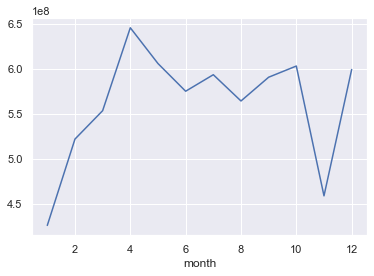

In [207]:
(data.groupby('month').Weekly_Sales.sum()).plot()

1) Our observation was somewhat true, sales go down near the 6th month but not by much.

2) November records the lowest Sales overall.

3) April has the highest Sales.

In [208]:
semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
semester.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
Date,,,,,,,,
2010-01-31,1035,4.223988e+07,0,3144.06,123.045,7575.961790,381.388,45
2010-07-31,25875,1.168939e+09,0,69038.76,3163.802,188910.091258,9572.073,5040
2011-01-31,27945,1.289673e+09,180,68333.54,3561.511,204805.873519,10241.257,10260
2011-07-31,25875,1.150555e+09,0,68591.32,4090.563,192568.764647,9154.793,5130
2012-01-31,26910,1.257900e+09,180,67437.09,4121.914,202091.223320,9254.220,10080


Text(0.5, 1.0, 'Semester wise Sales')

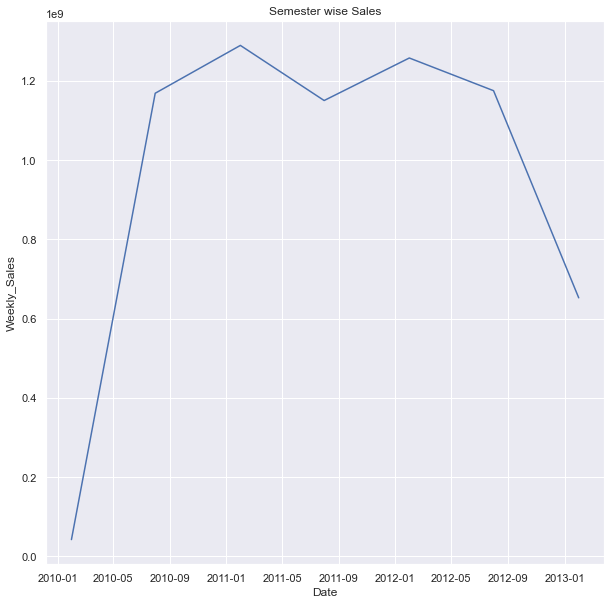

In [209]:
plt.figure(figsize=(10,10))
sns.lineplot(x=semester.index, y=semester['Weekly_Sales'])
plt.title('Semester wise Sales')

1) Sales are lowest in first semester of 2010 and 2013.

2) Sales are at their peak on first semester of 2011 and 2012.

## Task 6

In [210]:
new_data = data.copy()
new_data = new_data.sort_values(by='Date').reset_index()

In [211]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
new_data['Encoded_date'] = enc.fit_transform(new_data[['Date']])
new_data['Encoded_date'] += 1
new_data['Encoded_date'] = new_data['Encoded_date'].astype(int)
new_data.head()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,Encoded_date
0,606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,1,1
1,2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,1,1
2,5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,1,1
3,4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,1,1
4,5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,1,1


In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [213]:
X = new_data.drop(['index', 'month', 'Weekly_Sales', 'Date'], axis=1)
y = new_data['Weekly_Sales']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [215]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [216]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.14226091387264395

In [217]:
y_pred = lr.predict(X_test)
mean_absolute_error(y_pred, y_test)

419386.1431796042

In [218]:
lr.score(X_test, y_test)

0.1370803802691467

R square of our default model is low and the mean absolute error is high, the features we have are providing minimal predictive power. 

Moreover the solution is not linear as we saw earlier in the Visuals. we may need a more complex algorithm to predict the sales properly.

In [219]:
lr.coef_ , X.columns

(array([-200676.005924  ,   21606.89651367,  -23857.86787763,
           7985.35059448,  -88449.04818185,  -44860.07773148,
          -5573.05849357]),
 Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
        'Unemployment', 'Encoded_date'],
       dtype='object'))

We can see that CPI and Unemployment have significant negative impact, while fuel_price have very small positive impact on Sales. 

## Task 7

In [220]:
new_data['Day'] = new_data['Date'].apply(lambda x: x.day)
new_data.head()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,Encoded_date,Day
0,606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,1,1,10
1,2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,1,1,10
2,5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,1,1,10
3,4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,1,1,10
4,5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,1,1,10
